In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch

In [3]:
# Create f(X) with a slope of -3 
X = torch.arange(-3, 3, 0.1).view(-1, 1) 
f = -3 * X 


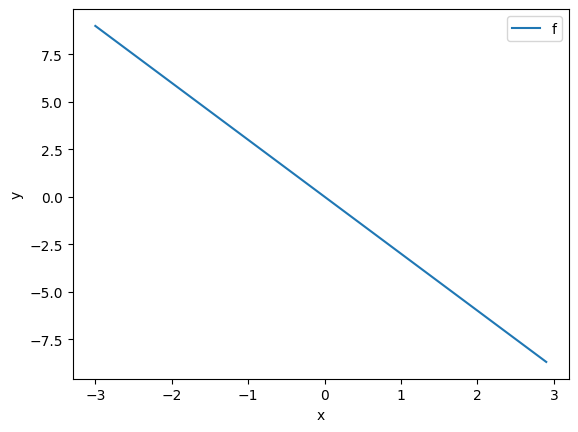

In [5]:
plt.plot(X.numpy(), f.numpy(), label='f') 
plt.xlabel('x')
plt.ylabel('y') 
plt.legend() 
plt.show() 

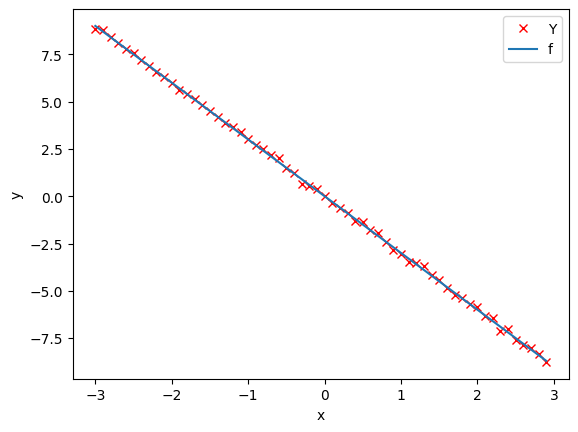

In [6]:
# Add some noise and save it in Y 
Y = f + 0.1 * torch.randn(X.size()) 

# Plot Y 
plt.plot(X.numpy(), Y.numpy(), 'rx', label='Y') 
plt.plot(X.numpy(), f.numpy(), label='f') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.legend() 
plt.show()

In [7]:
# Create the model and cost function (Total Loss) 
def forward(w, x):  
    return w * x 

# Create the MSE function using mse 
def criterion(y_hat, y): 
    return torch.mean((y_hat - y) ** 2)


In [19]:
# Define learning rate and empty list loss to record the loss for each iteration 
learning_rate = 0.1 
LOSS = []

In [20]:
# Create a model parameter by setting the argument `requires_grad` to True because the system must learn it 
w = torch.tensor(-10.0, requires_grad=True) 

In [28]:
# Plot Diagram class 
class PlotDiagram:
    # Constructor 
    def __init__(self, X, Y, w, stop, go = False): 
        start = w.data 
        self.error = [] 
        self.parameter = [] 
        self.X = X.numpy() 
        self.Y = Y.numpy() 
        self.parameter_values = torch.arange(start, stop) 
        self.loss_function = [criterion(forward(w, X), Y) for w.data in self.parameter_values] 
    
    # Executor 
    def __call__(self, y_hat, w, error, n):  
        self.error.append(error)
        self.parameter.append(w.data) 
        plt.subplot(212) 
        plt.plot(self.X, y_hat.detach().numpy()) 
        plt.plot(self.X, self.Y, 'ro') 
        
        plt.xlabel("A") 
        plt.ylim(-20, 20)
        plt.subplot(211) 
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n)) 
        # Convert lists to PyTorch tensors 
        parameter_values_tensor = torch.tensor(self.parameter_values) 
        loss_function_tensor = torch.tensor(self.loss_function) 

        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy()) 

        plt.plot(self.parameter, self.error, 'ro') 
        plt.xlabel("B") 
        plt.figure() 
        plt.show()
    
    # Destructor 
    def __del__(self): 
        plt.close('all') 

In [29]:
gradient_plot = PlotDiagram(X, Y, w, stop=5) 

In [30]:
# Train a model 
def train_model(num_epochs): 
    for epoch in range(num_epochs): 
        # Make the prediction 
        y_hat = forward(w, X) 

        # Calcualte the error 
        loss = criterion(y_hat, Y)  

        # Plot the diagram 
        gradient_plot(y_hat, w, loss.item(), epoch) 

        # Store the loss into list 
        LOSS.append(loss.item()) 

        # backpropagation 
        # compute gradient of the loss with respect to the learnable parameters
        loss.backward() 

        # Update parameters
        # Gradient Descent 
        w.data = w.data - learning_rate * w.grad.data 

        # Zero the gradients before running the backward pass 
        w.grad.data.zero_()


C:\Users\Windows\AppData\Local\Temp\ipykernel_17068\896891854.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


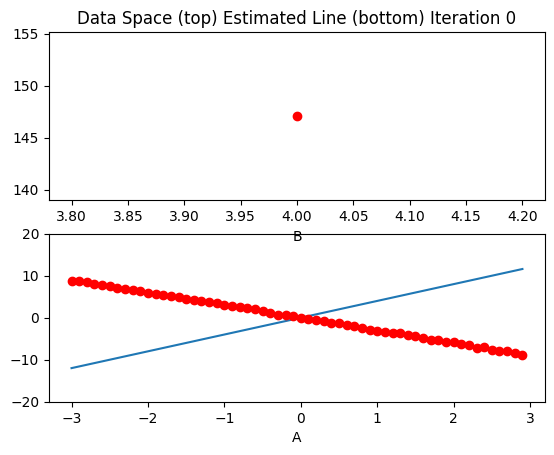

<Figure size 640x480 with 0 Axes>

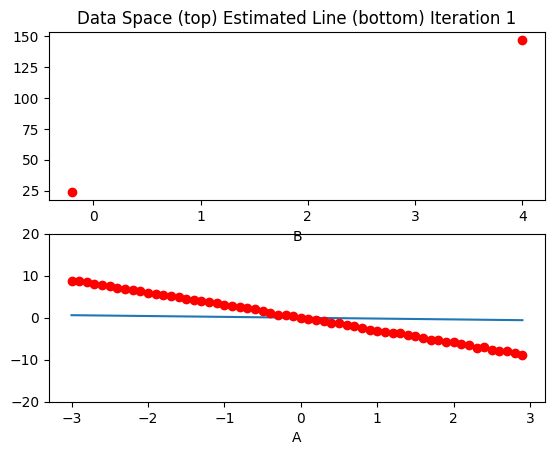

<Figure size 640x480 with 0 Axes>

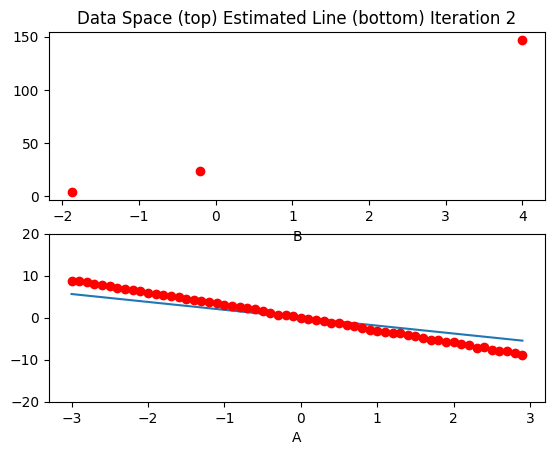

<Figure size 640x480 with 0 Axes>

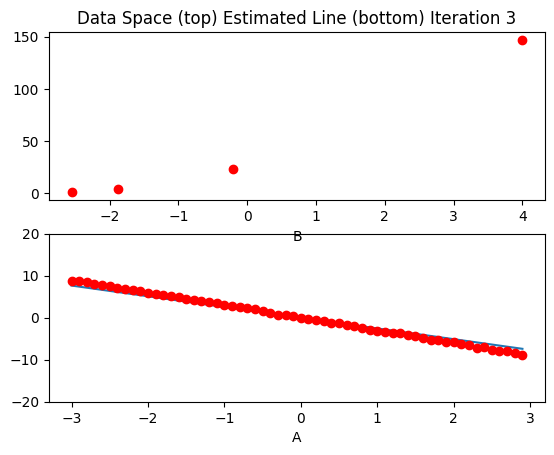

<Figure size 640x480 with 0 Axes>

In [31]:
# Let's try 4 iterations 
train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

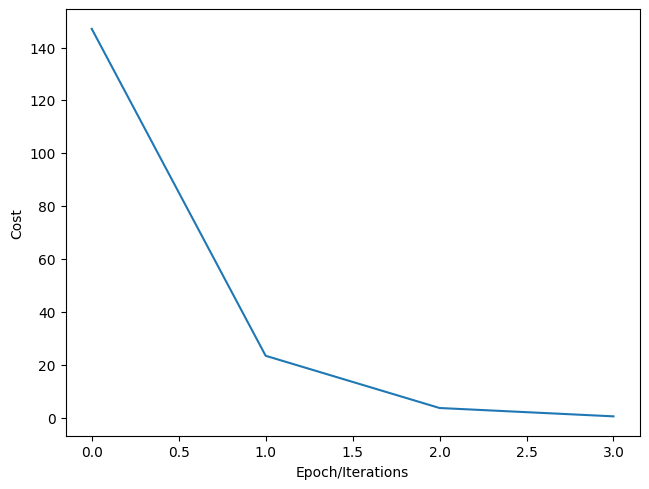

In [32]:
# Plot the loss 
plt.plot(LOSS) 
plt.tight_layout() 
plt.xlabel("Epoch/Iterations") 
plt.ylabel("Cost")